<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'


In [2]:
#This dataset is collected in Togo (West Africa) from an experiment I conducted during the Summer 2016. The purpose of this experiment is to examine whether women are competitve and if their competitve level increase when there is a switch of incentives(cash to children benefiting voucher).
#The experiment consists of 6 mains activities, which require participants to solve some math questions, and then a survey. In addition of conducting this analysis merly looking at gender, the experiment extended in classifying into group of poor and rich participants. To avoid correlation with other external factors,participants were made poor and rich during the experiment through additional fees.

In [3]:
path_to_file="../../AmReallyDying.dta"
# read a datafile in pyton using panda
data_file = pd.read_stata(path_to_file)
#rename columns names in data 
data_file = data_file.rename(index=str, columns={ "age": "subject_age", "nom": "subject_name", 
                                                  "rachoice": "risk_tolerence","parentyn": "parent",
                                                  "rich_poor":"experimental_income", "cmscore": "cash_round",
                                                 "cpscore": "voucher_round", "cmdecision":"decision_in_cash_round",
                                                  "cpdecision":"decision_in_voucher_round"})
#remove unecessary columns
data_file = data_file.drop(["var23","var36","var37","location","trtie","rankt","cmtie","rankcm","cptie","rankcp", "voucher","trscoreg2", "var38", "e1cement0tole", "e","var41", "ey1n0"],axis=1)

#display info
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 242
Data columns (total 24 columns):
id                           243 non-null int16
subject_age                  237 non-null float64
subject_name                 243 non-null object
occupation                   243 non-null object
workstatus                   243 non-null object
education                    243 non-null object
religion                     243 non-null object
experimental_income          243 non-null int8
gender                       243 non-null object
status                       243 non-null object
parent                       243 non-null object
piece_rate                   243 non-null int8
tournament                   243 non-null int8
decision_in_cash_round       243 non-null object
cash_round                   243 non-null int8
decision_in_voucher_round    243 non-null object
voucher_round                243 non-null int8
risk_tolerence               242 non-null float64
safepayout                 

In [4]:
#This command shows how many columns and rows the dataset consist of. 
data_file.shape

(243, 24)

In [5]:
#This command shows how many data entries I have in the whole dataset. 
data_file.size

5832

In [6]:
#dropping the missing values in these two variables.
data_file=data_file.dropna(subset=['subject_age','risk_tolerence','wtp_switchbackforth'])

In [7]:
data_file

,id,subject_age,subject_name,occupation,workstatus,education,religion,experimental_income,gender,status,...,cash_round,decision_in_voucher_round,voucher_round,risk_tolerence,safepayout,wtpchoicea,wtp_1stswitchchoice,wtp_switchbackforth,cash,guessing3b
0,101,15.0,Sola,student,other,secondary,chretienne,0,feminin,celibataire,...,8,tarif,7,2.0,3,7.0,3.0,1.0,,8
1,102,49.0,issifou,student,full time,primary,musulman,1,masculin,divorce,...,5,tarif,5,1.0,3,6.0,1.0,1.0,,12
2,103,21.0,Anass,student,other,university,musulman,0,masculin,celibataire,...,9,tarif,11,3.0,3,6.0,3.0,1.0,,5
3,104,23.0,Hippolyte,student,part time,university,chretienne,0,masculin,celibataire,...,8,tarif,10,3.0,3,5.0,6.0,0.0,1300,4
4,105,19.0,Didier,student,,highschool,chretienne,1,masculin,celibataire,...,7,tarif,7,2.0,3,8.0,5.0,1.0,,7
5,106,16.0,Olivier,student,other,highschool,chretienne,1,masculin,celibataire,...,8,tarif,11,1.0,3,6.0,5.0,1.0,,7
6,107,15.0,Aurel,student,,highschool,chretienne,0,masculin,celibataire,...,10,tarif,11,5.0,3,11.0,12.0,0.0,2300,9
7,108,21.0,Narcisio,student,other,university,chretienne,1,masculin,celibataire,...,5,tarif,7,1.0,1,4.0,4.0,1.0,,5
8,109,20.0,Jean paul,,other,highschool,chretienne,0,masculin,celibataire,...,9,tournoi,10,6.0,1,4.0,5.0,0.0,1400,5
9,110,16.0,Enos,,other,highschool,chretienne,1,masculin,celibataire,...,5,tarif,7,1.0,1,9.0,10.0,0.0,1900,5


In [8]:
#Changing floats into intergers.
data_file.risk_tolerence = [int(float(x)) for x in data_file.risk_tolerence]
data_file.subject_age = [int(float(x)) for x in data_file.subject_age]


In [9]:
#This command shows the summary statistics of the experiment.
data_file.describe().T


,count,mean,std,min,25%,50%,75%,max
id,221.0,435.447964,270.716210,101.0,207.0,324.0,605.0,951.0
subject_age,221.0,27.796380,10.594132,15.0,21.0,24.0,31.0,60.0
experimental_income,221.0,0.493213,0.501089,0.0,0.0,0.0,1.0,1.0
piece_rate,221.0,5.067873,2.678179,0.0,3.0,5.0,7.0,14.0
tournament,221.0,5.959276,2.889348,0.0,4.0,6.0,7.0,15.0
cash_round,221.0,6.443439,2.692197,0.0,5.0,6.0,8.0,16.0
voucher_round,221.0,6.728507,2.818535,1.0,5.0,7.0,8.0,18.0
risk_tolerence,221.0,2.190045,1.492433,1.0,1.0,2.0,3.0,6.0
safepayout,221.0,3.208145,1.514213,1.0,3.0,3.0,4.0,6.0
wtpchoicea,221.0,6.895928,4.142137,0.0,4.0,7.0,11.0,12.0


In [10]:
# Show the first fifth entries of the dataset.
data_file.head(5)


,id,subject_age,subject_name,occupation,workstatus,education,religion,experimental_income,gender,status,...,cash_round,decision_in_voucher_round,voucher_round,risk_tolerence,safepayout,wtpchoicea,wtp_1stswitchchoice,wtp_switchbackforth,cash,guessing3b
0,101,15,Sola,student,other,secondary,chretienne,0,feminin,celibataire,...,8,tarif,7,2,3,7.0,3.0,1.0,,8
1,102,49,issifou,student,full time,primary,musulman,1,masculin,divorce,...,5,tarif,5,1,3,6.0,1.0,1.0,,12
2,103,21,Anass,student,other,university,musulman,0,masculin,celibataire,...,9,tarif,11,3,3,6.0,3.0,1.0,,5
3,104,23,Hippolyte,student,part time,university,chretienne,0,masculin,celibataire,...,8,tarif,10,3,3,5.0,6.0,0.0,1300,4
4,105,19,Didier,student,,highschool,chretienne,1,masculin,celibataire,...,7,tarif,7,2,3,8.0,5.0,1.0,,7


In [11]:
data_file.describe()

,id,subject_age,experimental_income,piece_rate,tournament,cash_round,voucher_round,risk_tolerence,safepayout,wtpchoicea,wtp_1stswitchchoice,wtp_switchbackforth,guessing3b
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,435.447964,27.796380,0.493213,5.067873,5.959276,6.443439,6.728507,2.190045,3.208145,6.895928,4.873303,0.031674,6.122172
std,270.716210,10.594132,0.501089,2.678179,2.889348,2.692197,2.818535,1.492433,1.514213,4.142137,4.308793,0.175529,3.312306
min,101.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,207.000000,21.000000,0.000000,3.000000,4.000000,5.000000,5.000000,1.000000,3.000000,4.000000,0.000000,0.000000,4.000000
50%,324.000000,24.000000,0.000000,5.000000,6.000000,6.000000,7.000000,2.000000,3.000000,7.000000,5.000000,0.000000,5.000000
75%,605.000000,31.000000,1.000000,7.000000,7.000000,8.000000,8.000000,3.000000,4.000000,11.000000,9.000000,0.000000,7.000000
max,951.000000,60.000000,1.000000,14.000000,15.000000,16.000000,18.000000,6.000000,6.000000,12.000000,12.000000,1.000000,20.000000


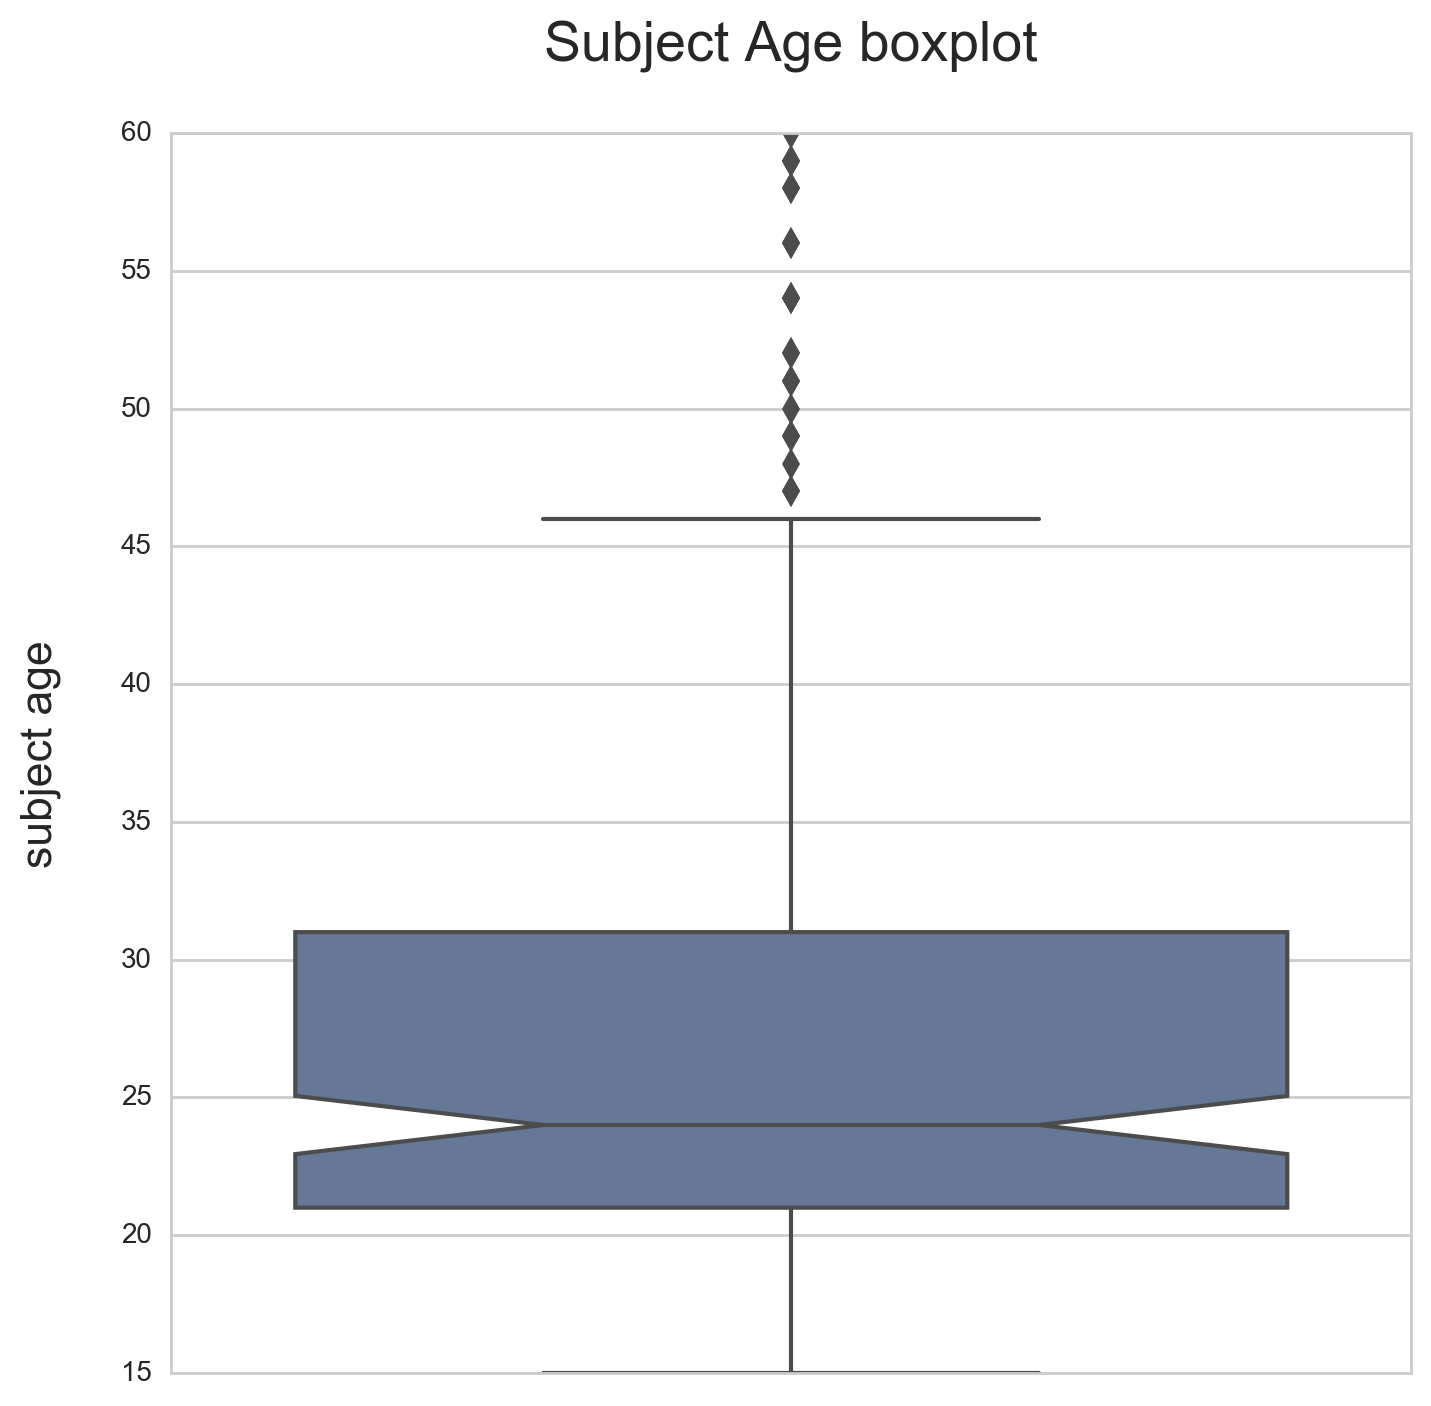

In [12]:
#Showing the outliers in the age variable. The average age range lies between approximately 21-31, and I have some outliers starting from 47 year old. 
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.boxplot(data_file.subject_age, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('subject age\n', fontsize=16)
ax.set_title('Subject Age boxplot\n', fontsize=20)

plt.show()

In [13]:
#showing the correlation among variables. 
data_file.corr()

,id,subject_age,experimental_income,piece_rate,tournament,cash_round,voucher_round,risk_tolerence,safepayout,wtpchoicea,wtp_1stswitchchoice,wtp_switchbackforth,guessing3b
id,1.000000,0.288643,0.243575,-0.084553,-0.161417,-0.085754,-0.158217,0.094629,0.677339,-0.014186,-0.194538,-0.221171,-0.129821
subject_age,0.288643,1.000000,0.054110,-0.202008,-0.171784,-0.170692,-0.136275,0.024883,0.138663,0.104755,-0.242140,-0.089401,-0.015091
experimental_income,0.243575,0.054110,1.000000,-0.086025,-0.190132,-0.132536,-0.187977,-0.095517,0.115693,-0.005817,-0.114084,0.028295,-0.156969
piece_rate,-0.084553,-0.202008,-0.086025,1.000000,0.659427,0.678553,0.604013,-0.060103,0.139970,0.168635,0.195333,-0.072278,0.099491
tournament,-0.161417,-0.171784,-0.190132,0.659427,1.000000,0.725753,0.684049,-0.039307,0.046621,0.104089,0.129927,0.038405,0.263169
cash_round,-0.085754,-0.170692,-0.132536,0.678553,0.725753,1.000000,0.746752,-0.028989,0.079838,0.055516,0.160428,0.027855,0.146816
voucher_round,-0.158217,-0.136275,-0.187977,0.604013,0.684049,0.746752,1.000000,-0.086012,-0.013325,0.067261,0.137510,0.081774,0.126263
risk_tolerence,0.094629,0.024883,-0.095517,-0.060103,-0.039307,-0.028989,-0.086012,1.000000,0.068906,0.156889,0.017898,-0.057786,0.077117
safepayout,0.677339,0.138663,0.115693,0.139970,0.046621,0.079838,-0.013325,0.068906,1.000000,0.142614,0.013814,-0.093325,0.023908
wtpchoicea,-0.014186,0.104755,-0.005817,0.168635,0.104089,0.055516,0.067261,0.156889,0.142614,1.000000,0.229490,-0.039208,0.065203


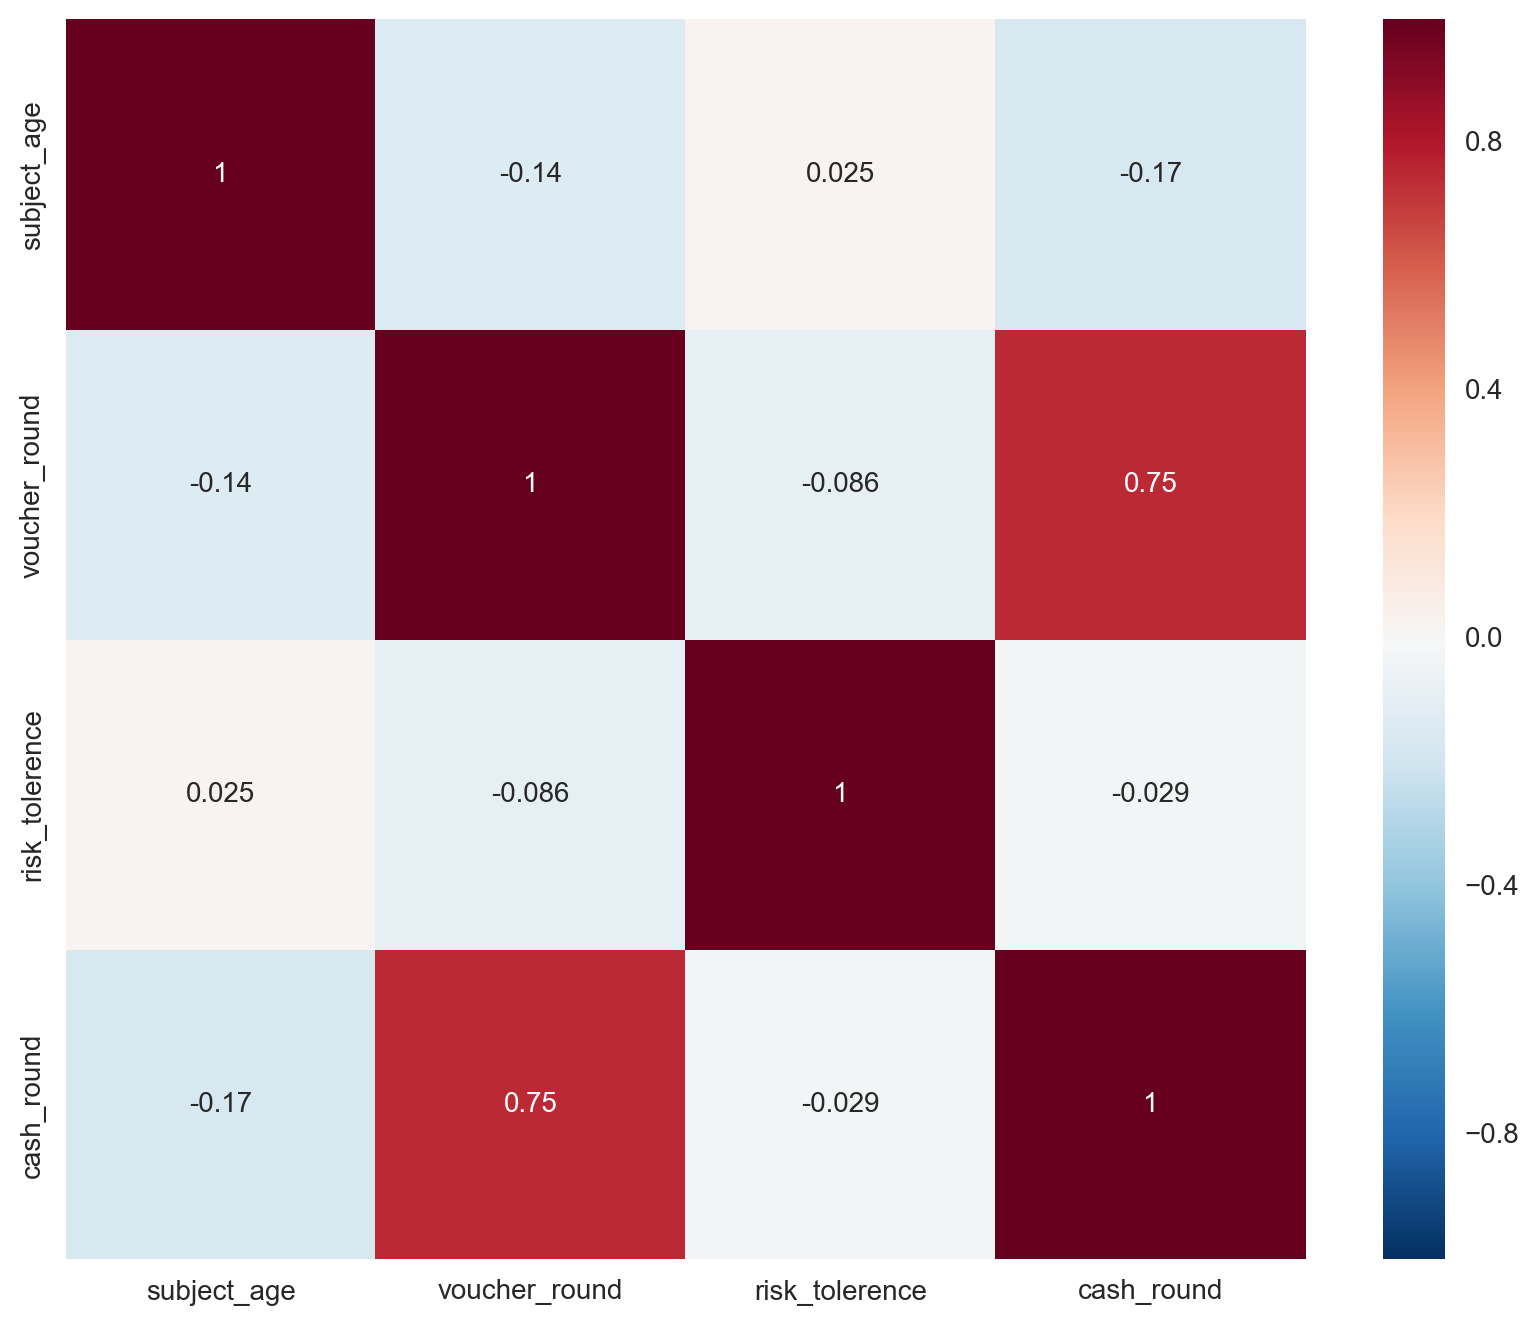

In [58]:
#Here I am looking at the coorelation among 5 variables. 
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(data_file[['subject_age','experimental_income','voucher_round','risk_tolerence','cash_round']].corr(),annot=True, ax=ax)
plt.show()

#It can be observed that the performances in the cash and voucher rounds are highly positively correlated.This can be explain by the fact that participants are impacted by the results of the first activities between these two (cash_round). Age seems to be negatively correlated with these two variables.It is interesting to see that age actually does not have any correlation with risk_tolerance.  

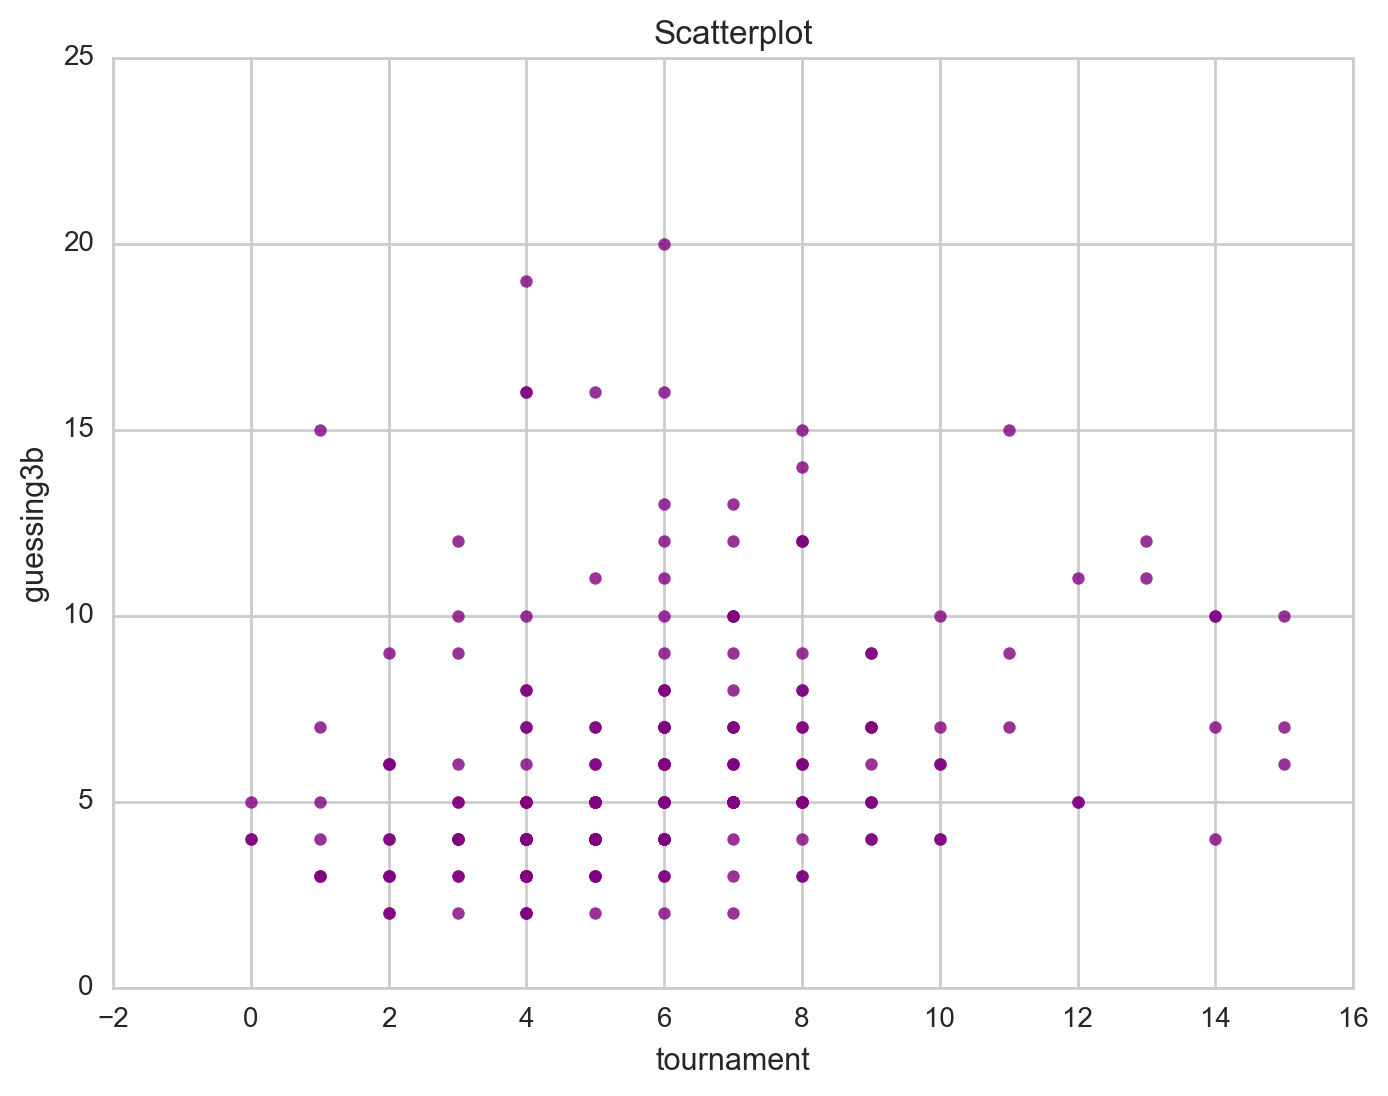

In [15]:
#examining if there is any relation between the guessing variable and the tournament variable. 
guessing = data_file.tournament
tournament = data_file.guessing3b

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(guessing, tournament, fit_reg=False, color='purple', ax=ax)

ax.set_title('Scatterplot')
plt.show()

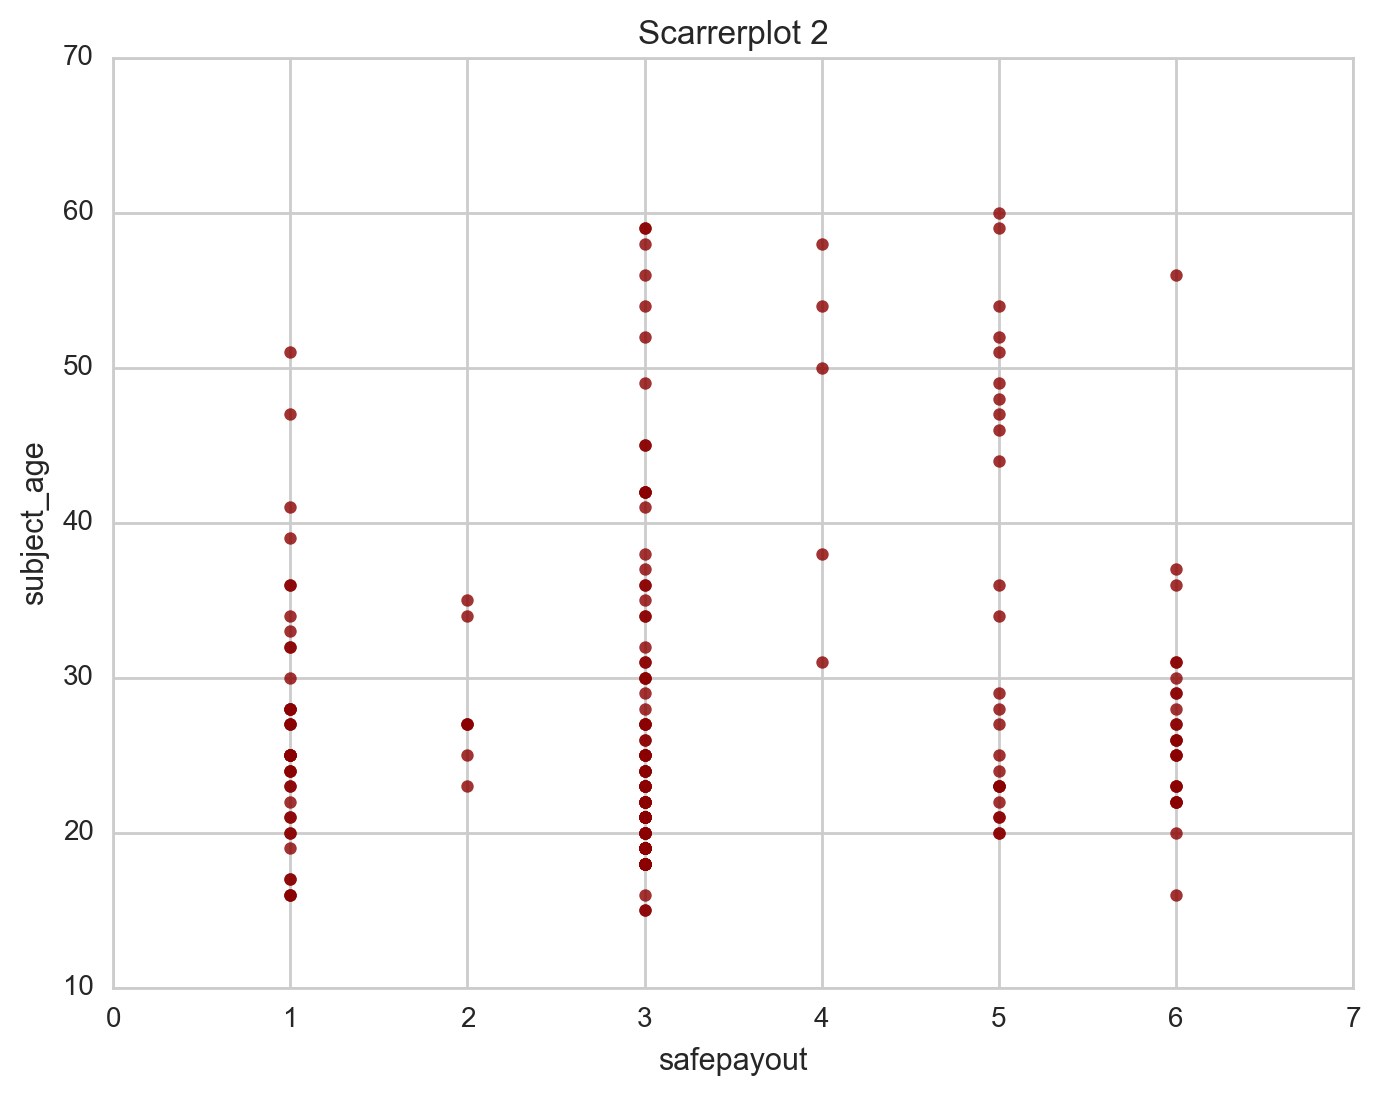

In [16]:
#examining if there is any relation between the age variable and the safepayout variable.
#The graph shows that there is no relationship between the age variable and the safepayout.This means that the payout that participants got at the end of the experiment did not depend on their age. This totally makes sense because participants were paid based on their performance.  
safepayout = data_file.safepayout
subject_age = data_file.subject_age

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(safepayout, subject_age, fit_reg=False, color='darkred', ax=ax)

ax.set_title('Scarrerplot 2')
plt.show()

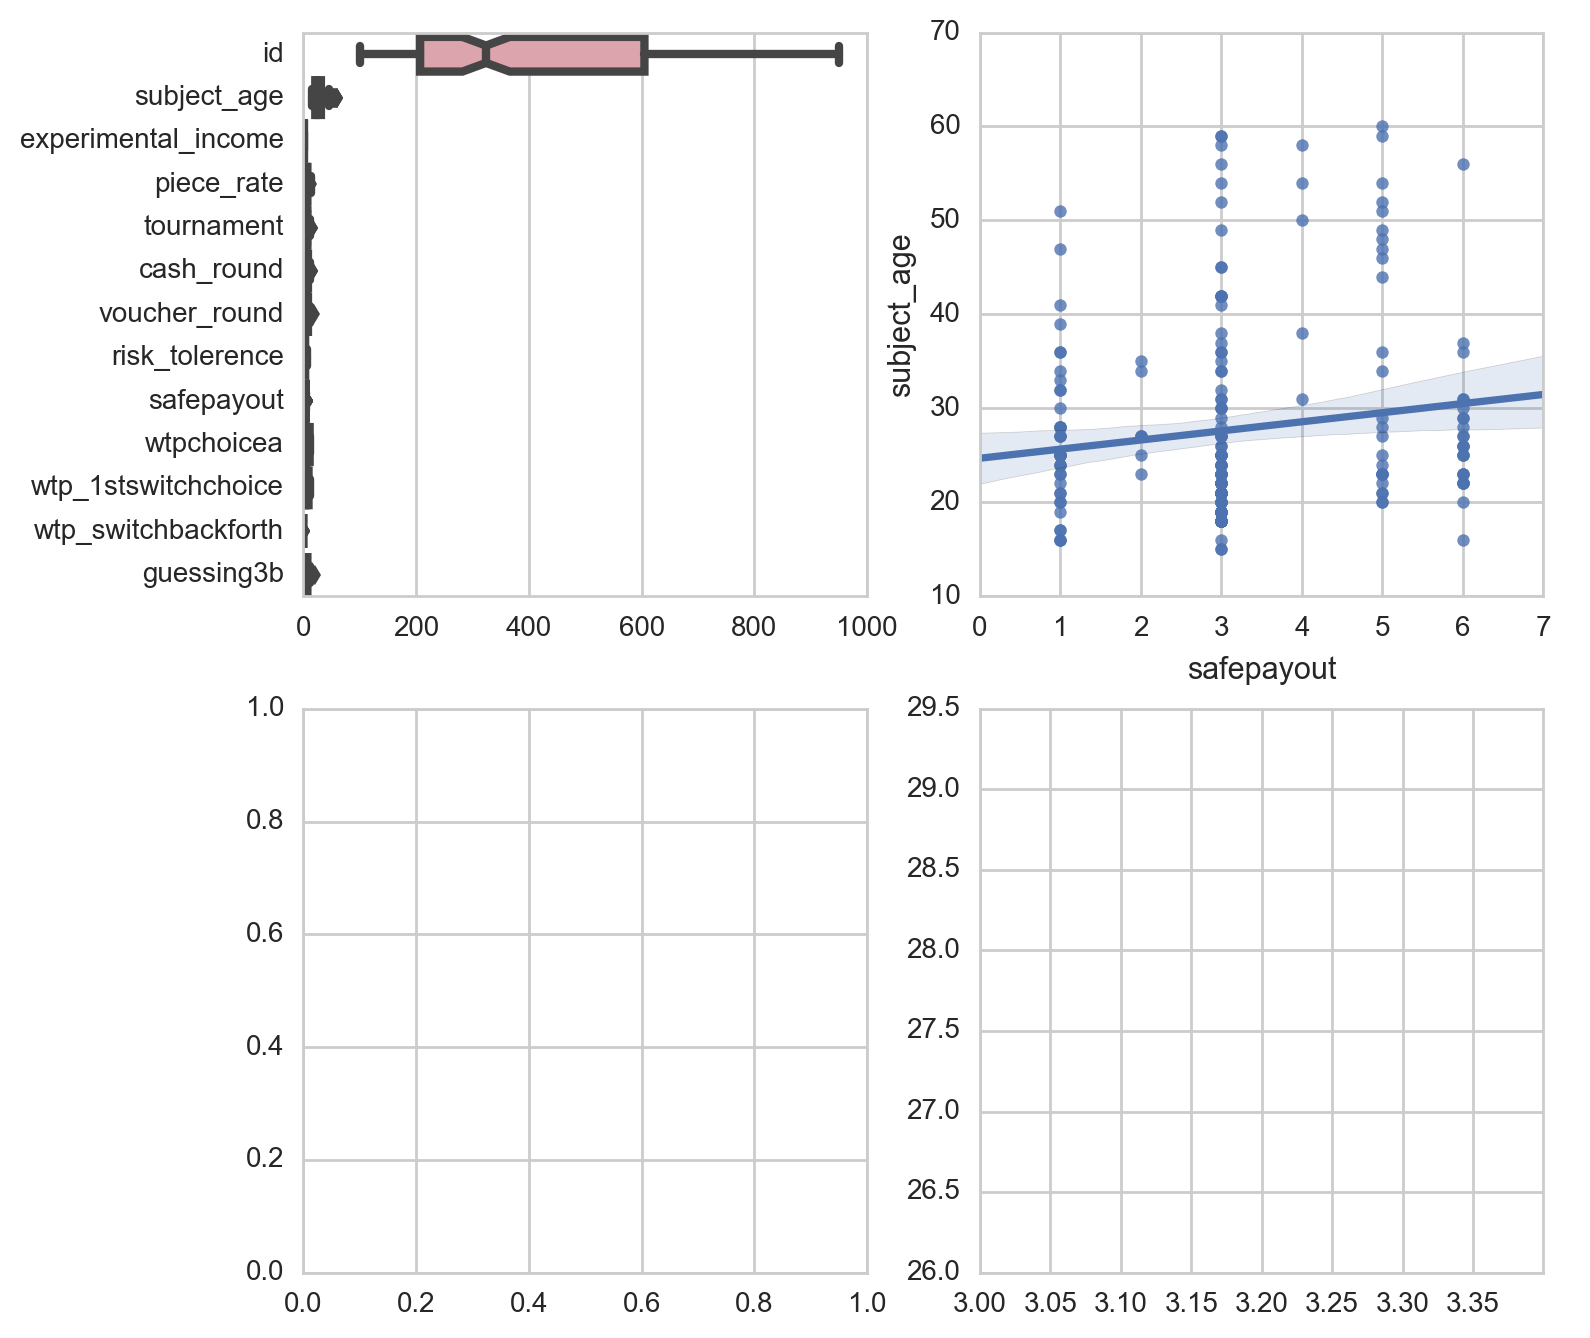

In [17]:
#Based on this plot, I don't see any relationship between these two variables.
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                        sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=data_file, orient='h',
           fliersize=5, linewidth=3, notch=True,
           saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(data_file.safepayout,
                      data_file.subject_age, ax=axarr[0,1])

plt.show()

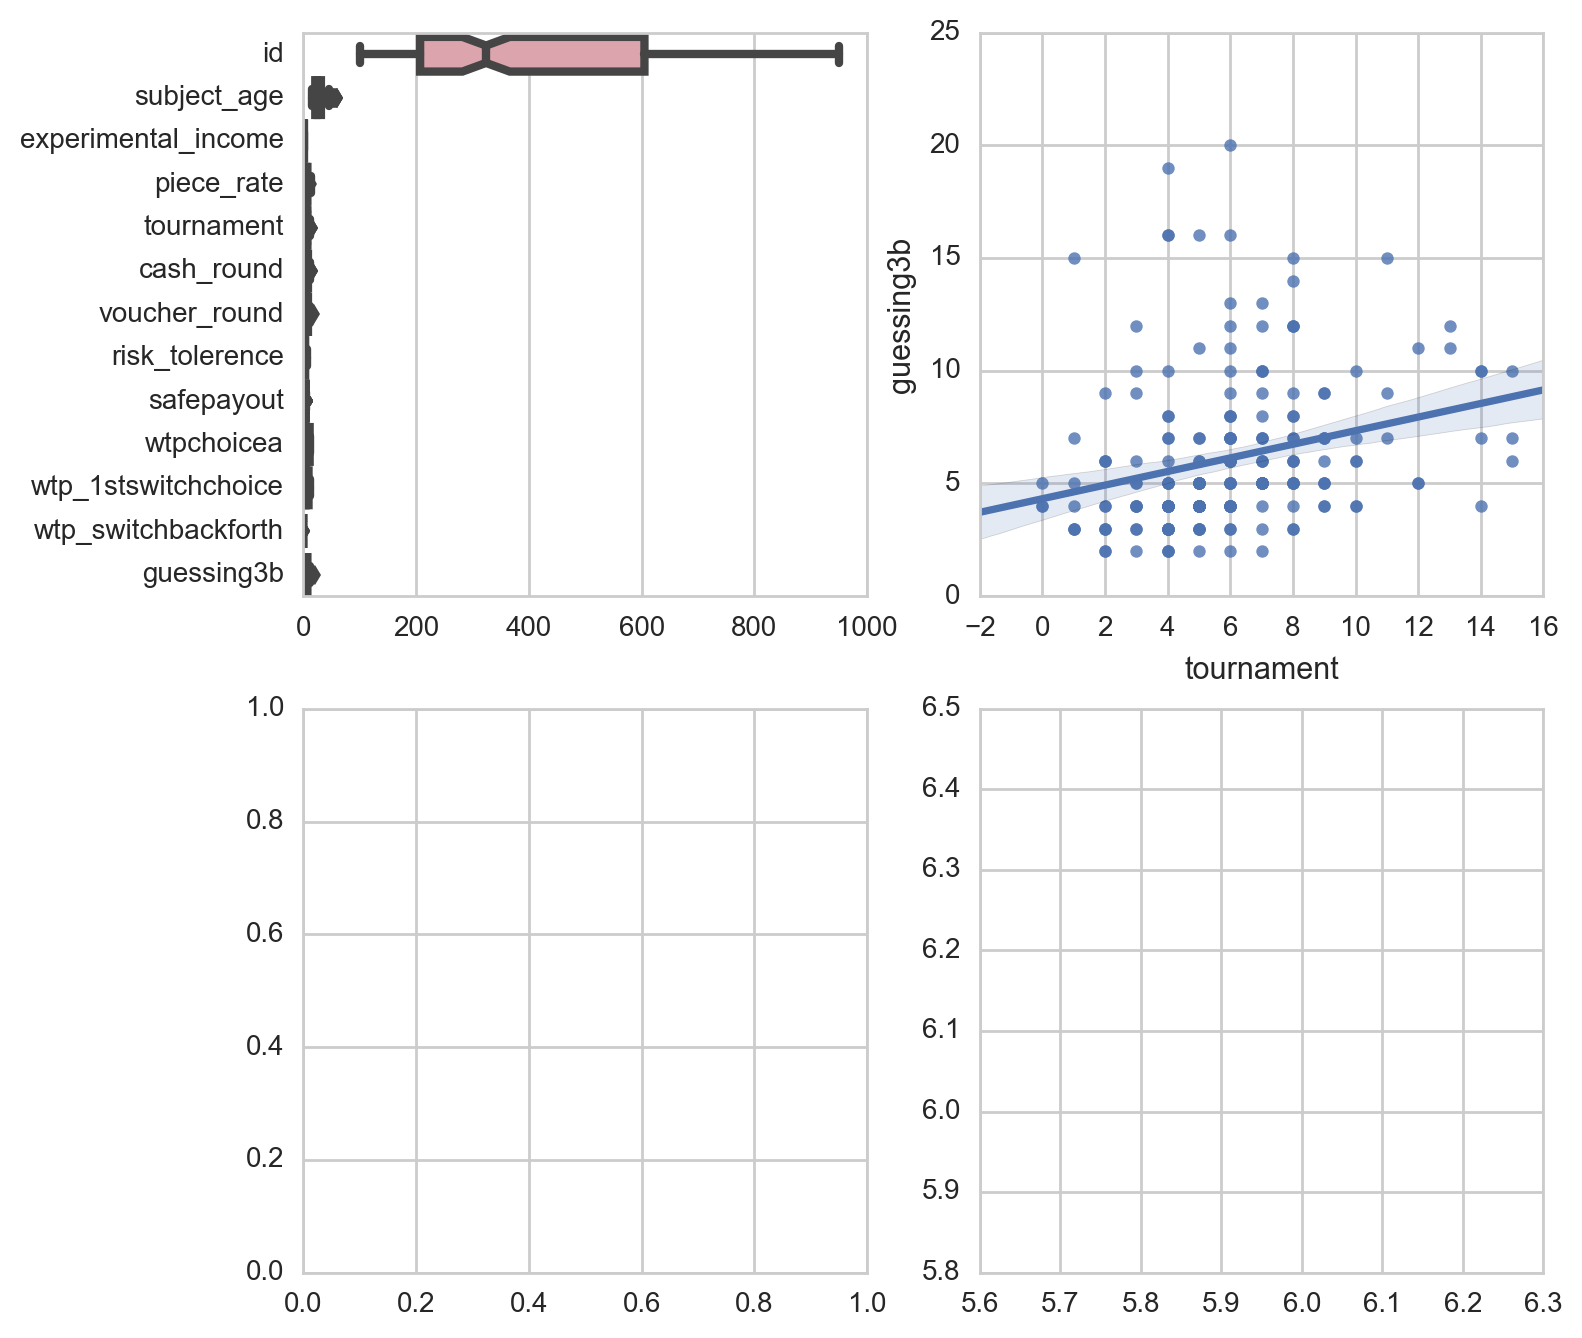

In [18]:
#This shows that there is a positive relationship between tournament and the guessing round.
# This tells us that an increase in the the tournament score, results in an increase inthe guessing of the opponent scrore in that same round.
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                        sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=data_file, orient='h',
           fliersize=5, linewidth=3, notch=True,
           saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(data_file.tournament,
                      data_file.guessing3b, ax=axarr[0,1])

plt.show()

In [19]:
#assigning new name to the elements in the gender variable
data_file.gender=data_file.gender.apply(lambda x:"Female" if x=="feminin" else "Male" if x=="masculin"else x)
data_file.decision_in_cash_round=data_file.decision_in_cash_round.apply(lambda x: 1 if x=="tournoi" else 0 if x=="tarif"else x)
data_file.decision_in_voucher_round=data_file.decision_in_voucher_round.apply(lambda x: 1 if x=="tournoi" else 0 if x=="tarif"else x)
data_file.experimental_income=data_file.experimental_income.apply(lambda x: "rich" if x== 1 else "poor" if x== 0 else x)

In [20]:
data_file

,id,subject_age,subject_name,occupation,workstatus,education,religion,experimental_income,gender,status,...,cash_round,decision_in_voucher_round,voucher_round,risk_tolerence,safepayout,wtpchoicea,wtp_1stswitchchoice,wtp_switchbackforth,cash,guessing3b
0,101,15,Sola,student,other,secondary,chretienne,poor,Female,celibataire,...,8,0,7,2,3,7.0,3.0,1.0,,8
1,102,49,issifou,student,full time,primary,musulman,rich,Male,divorce,...,5,0,5,1,3,6.0,1.0,1.0,,12
2,103,21,Anass,student,other,university,musulman,poor,Male,celibataire,...,9,0,11,3,3,6.0,3.0,1.0,,5
3,104,23,Hippolyte,student,part time,university,chretienne,poor,Male,celibataire,...,8,0,10,3,3,5.0,6.0,0.0,1300,4
4,105,19,Didier,student,,highschool,chretienne,rich,Male,celibataire,...,7,0,7,2,3,8.0,5.0,1.0,,7
5,106,16,Olivier,student,other,highschool,chretienne,rich,Male,celibataire,...,8,0,11,1,3,6.0,5.0,1.0,,7
6,107,15,Aurel,student,,highschool,chretienne,poor,Male,celibataire,...,10,0,11,5,3,11.0,12.0,0.0,2300,9
7,108,21,Narcisio,student,other,university,chretienne,rich,Male,celibataire,...,5,0,7,1,1,4.0,4.0,1.0,,5
8,109,20,Jean paul,,other,highschool,chretienne,poor,Male,celibataire,...,9,1,10,6,1,4.0,5.0,0.0,1400,5
9,110,16,Enos,,other,highschool,chretienne,rich,Male,celibataire,...,5,0,7,1,1,9.0,10.0,0.0,1900,5


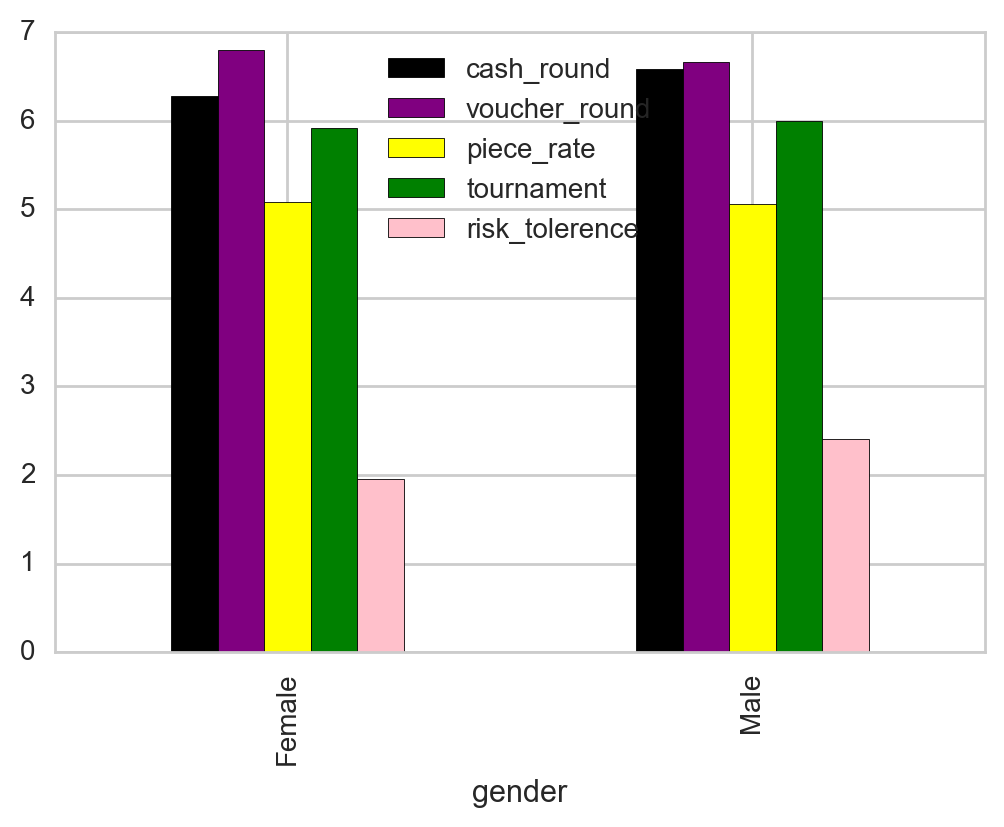

In [44]:
#comparing the performance in two activities (cmscore&cpscore) by gender. 
data_file.groupby(['gender'])['cash_round','voucher_round', 'piece_rate','tournament','risk_tolerence'].mean().plot(kind="bar", color=["black","purple","yellow","green","pink"], width=0.5)
plt.show()



In [22]:
#The above graph show that on average, males perfomance in the cash round "cmscore" is slightly higher that females performances. 
#However, when the incentive switched from cash to a child benefiting reward, it can be observed that on average, male and female performances are identical.
#In both the piece rate and tournament rounds, it can be seen that on average males performed slightly higher than females. 

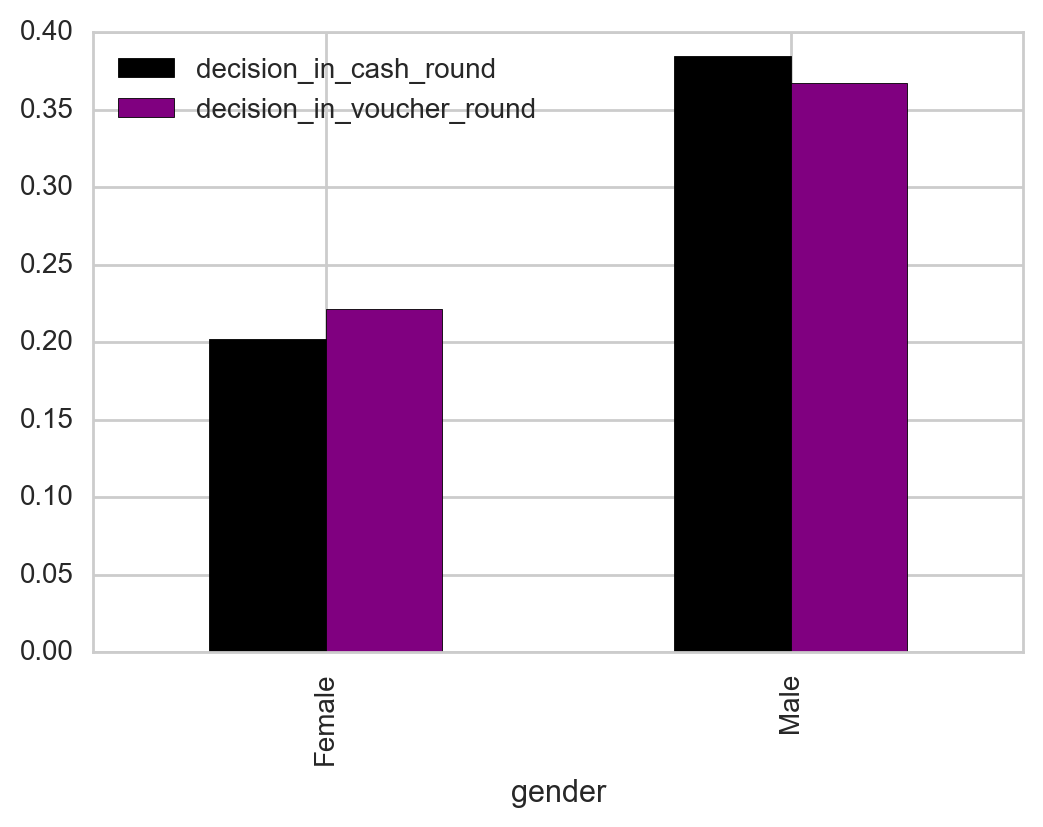

In [32]:
data_file.groupby(['gender'])['decision_in_cash_round','decision_in_voucher_round'].mean().plot(kind="bar", color=["black","purple"], width=0.5)
plt.show()


In [24]:
#Report
#The above graph shows the decisions made the the participants during the cash and voucher activities. 
#When the incentive is cash, women are less likely to self select into competition relative to men. However, when the incentive switches to a reward that benefit their children, women level of competition increases, while men's one decreases. 

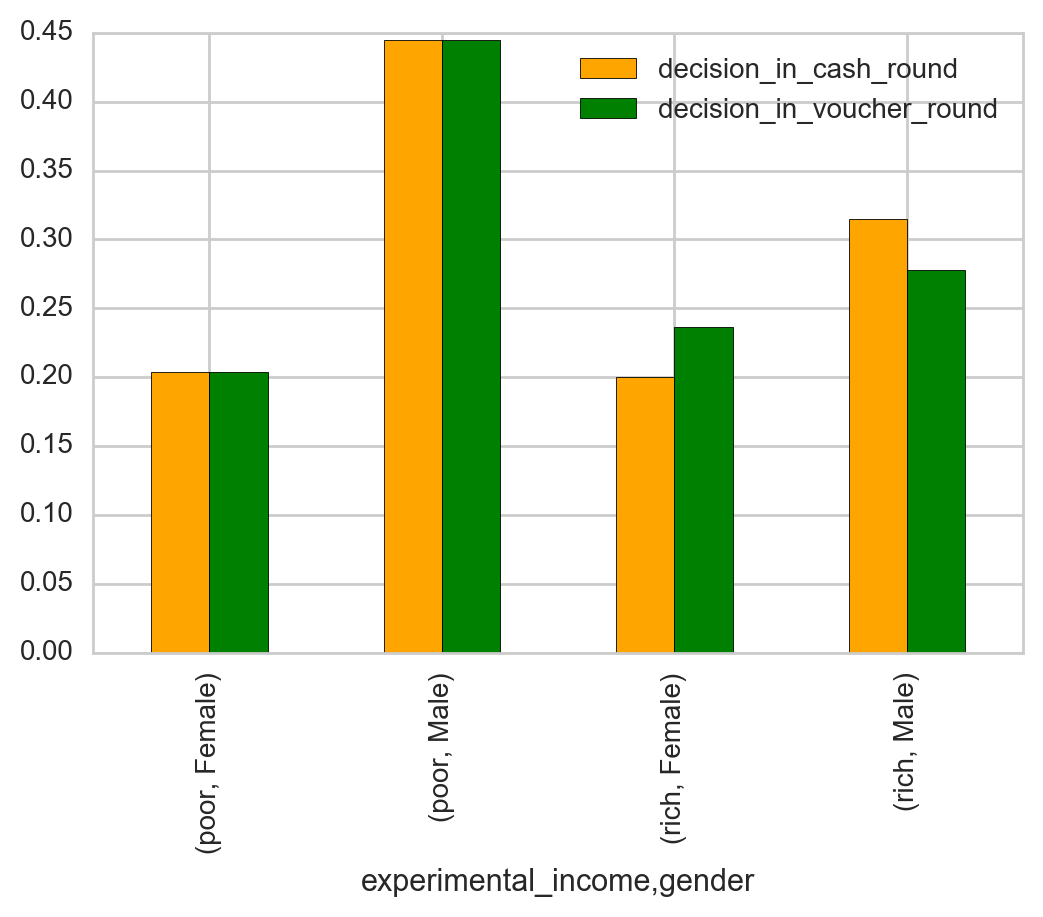

In [49]:
data_file.groupby(['experimental_income','gender'])['decision_in_cash_round','decision_in_voucher_round'].mean().plot(kind="bar", color=["orange","green"], width=0.5)


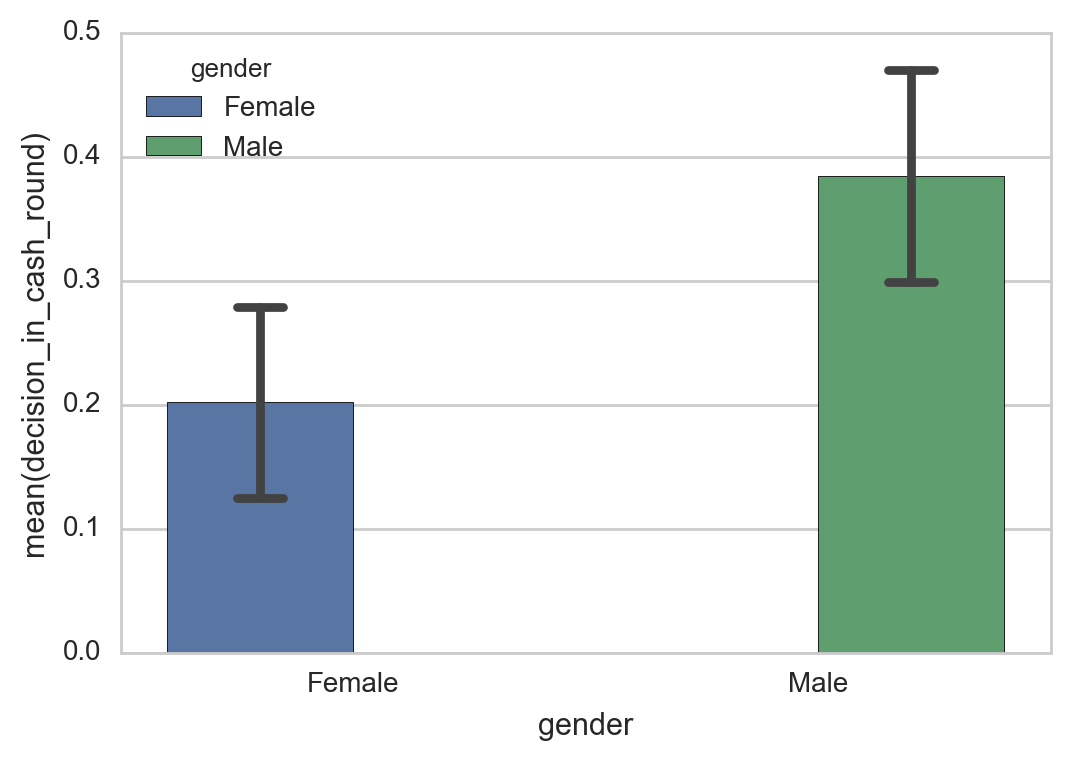

In [54]:
#data_file.groupby(['experimental_income','gender'])['decision_in_cash_round','decision_in_voucher_round'].mean().plot(kind="bar", color=["orange","green"], width=0.5)
#plt.show()
sns.set_style("whitegrid")
tips = data_file
ax = sns.barplot(x="gender",y="decision_in_cash_round", hue="gender", data=tips, capsize=.1)
plt.show()

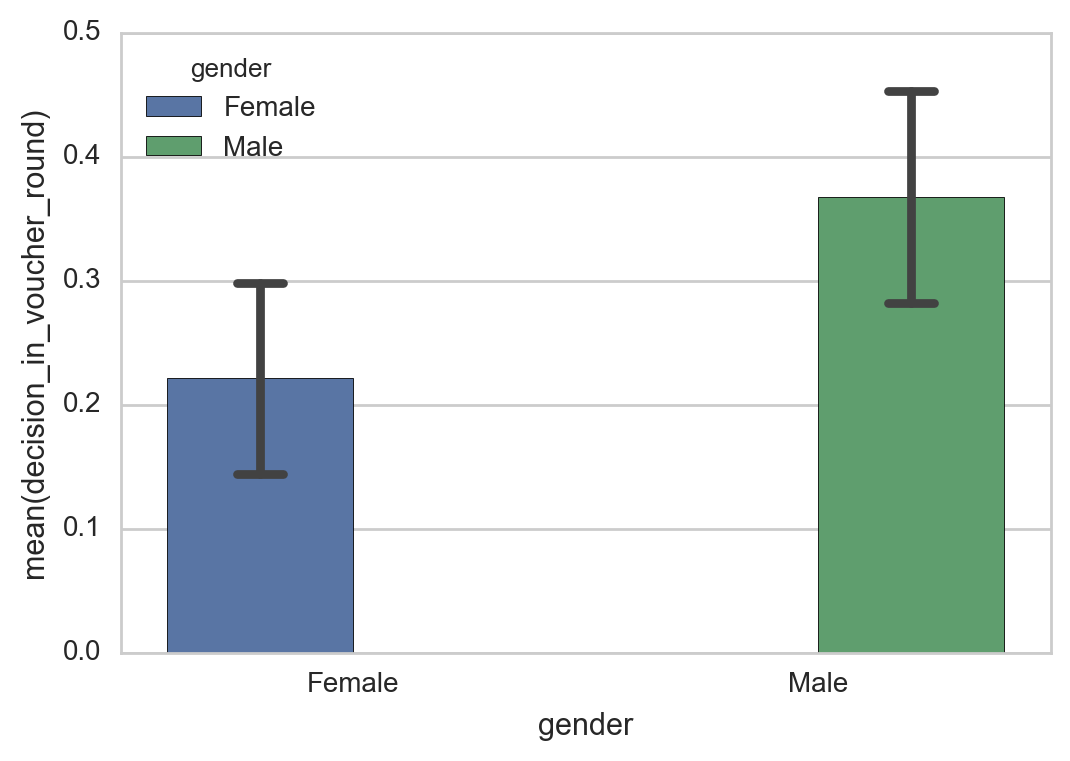

In [53]:
ax = sns.barplot(x="gender",y="decision_in_voucher_round", hue="gender", data=tips, capsize=.1)

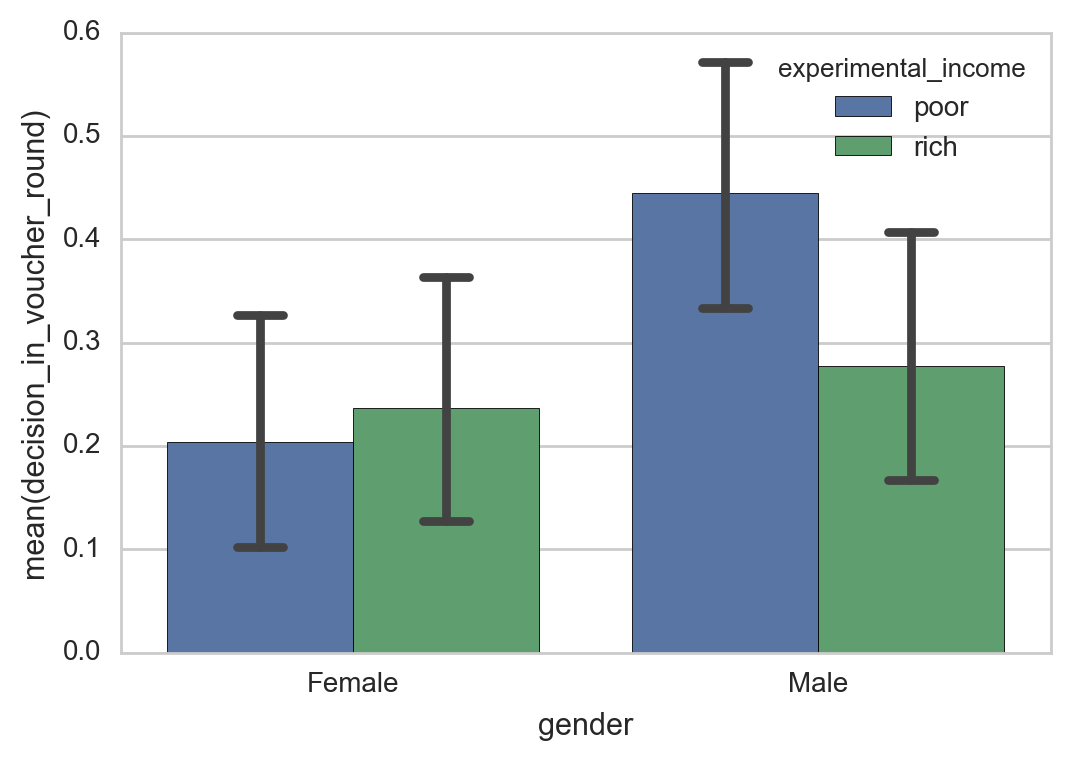

In [55]:
ax = sns.barplot(x="gender",y="decision_in_voucher_round", hue="experimental_income", data=tips, capsize=.1)

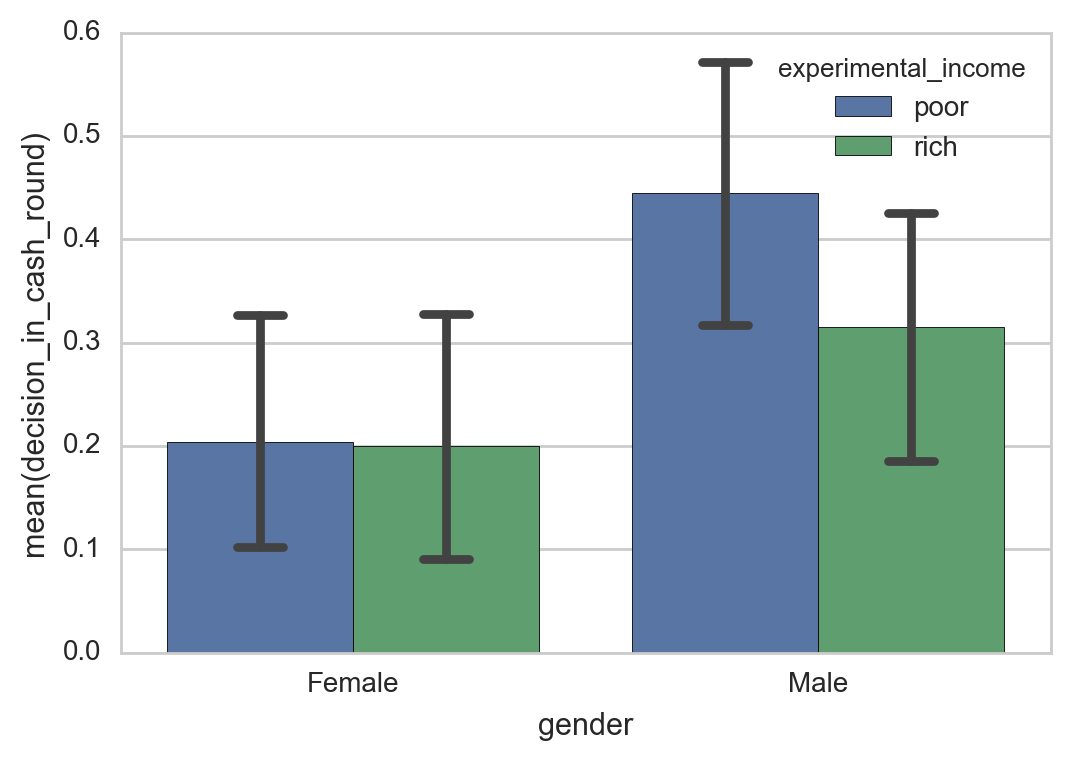

In [57]:
ax = sns.barplot(x="gender",y="decision_in_cash_round", hue="experimental_income", data=tips, capsize=.1)

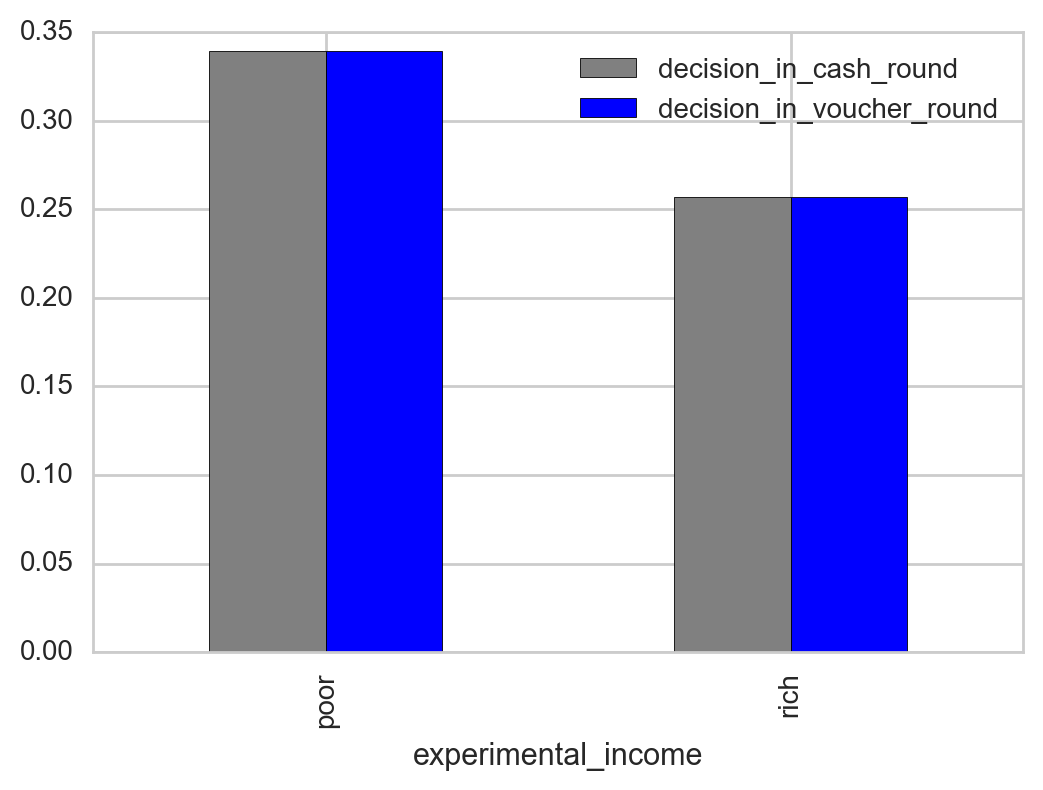

In [45]:
data_file.groupby(['experimental_income'])['decision_in_cash_round','decision_in_voucher_round'].mean().plot(kind="bar", color=["grey","blue"], width=0.5)
plt.show()

In [ ]:
#I was also interested in looking to see if people either male or female who are economically endowed are most like to self select into competition regardless of it the incentive is cash or voucher for kids. 
#However, when observing both gender seperately, it can be seen that poor females in both activities behave the same, but when we notice rich females seem to be more competitve when the reward is kids'voucher. 
#Like poor females, poor males also have the same level of competion in both activities when the reward is cash. However, rich males tend to be more competitive when the reward is cash than kids' voucher.  

SA mean: 27.7963800905
SA std: 10.5701357466


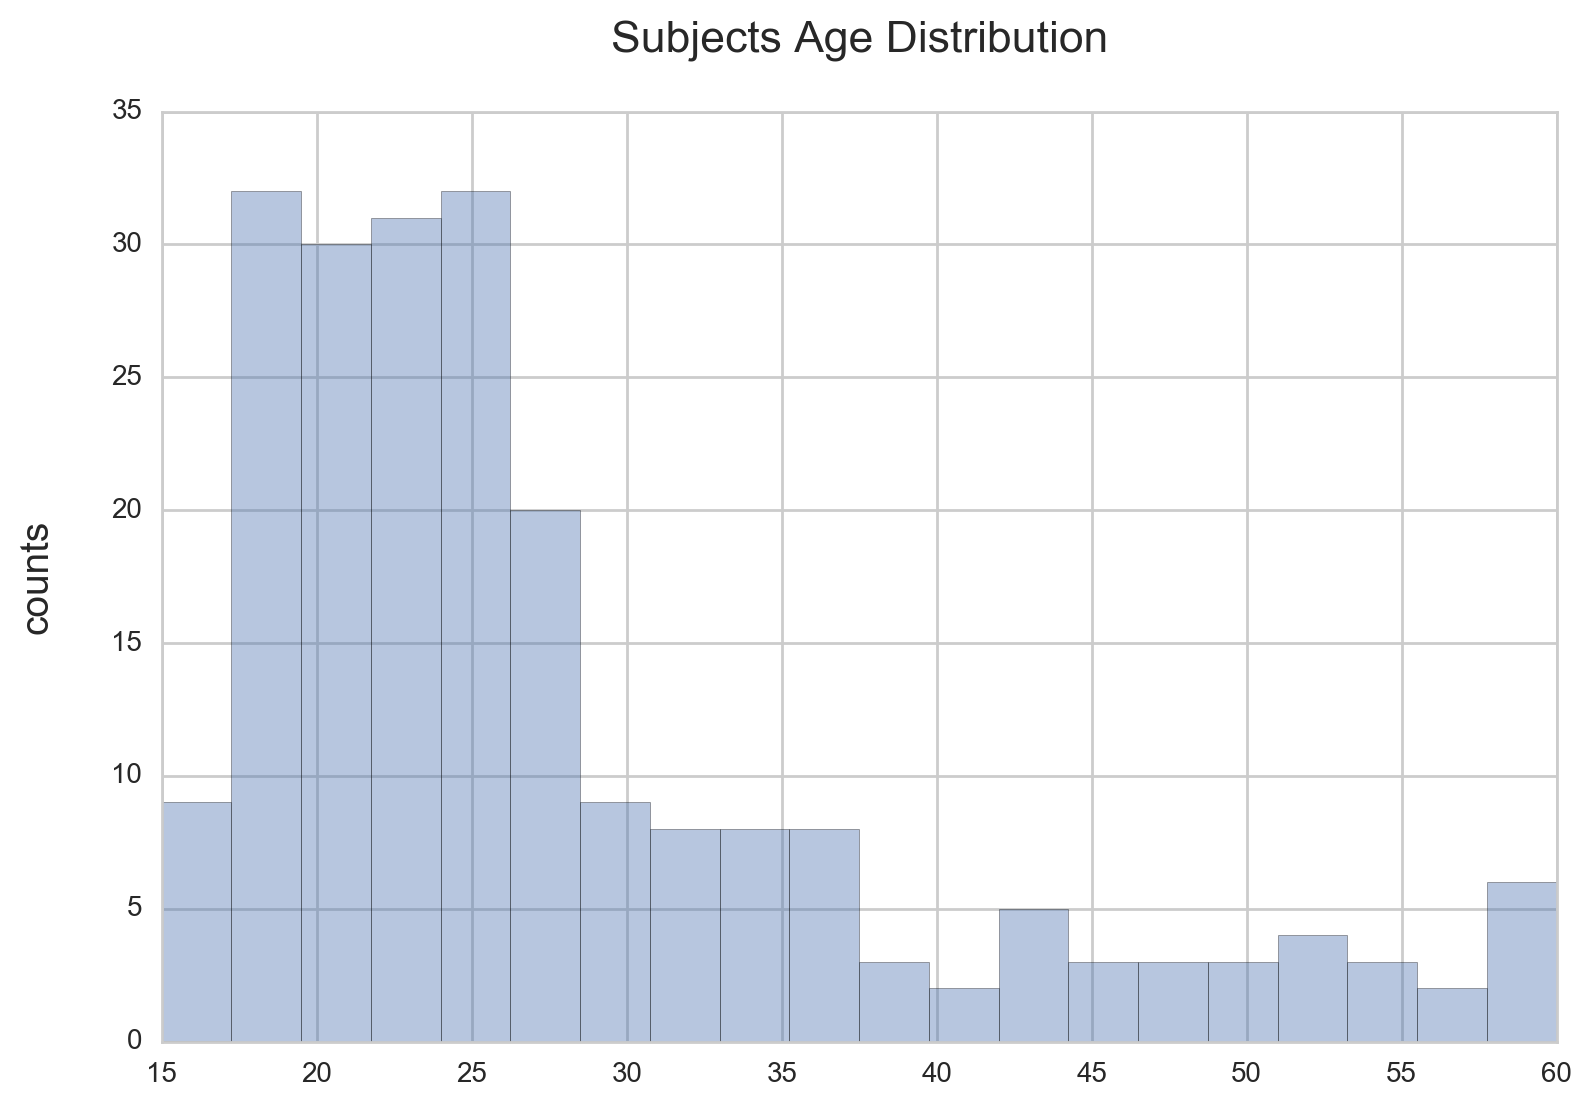

In [47]:
subject_age=data_file.subject_age.values
sa_mean = np.mean(subject_age)
sa_std = np.std(subject_age)
print 'SA mean:', sa_mean
print 'SA std:', sa_std
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax = sns.distplot(subject_age, bins=20, hist=True, kde=False,
                  ax=ax)
ax.set_ylabel('counts\n', fontsize=14)
ax.set_title('Subjects Age Distribution\n', fontsize=16)
plt.show()
#The distribution shows that the age data is more toward the left. 

In [ ]:
#Normalizung the distribution of subject age
sa_norm = (subject_age - sa_mean) / sa_std
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax = sns.distplot(sa_norm, bins=20, hist=True, kde=False,
                  ax=ax)
ax.set_ylabel('counts\n', fontsize=14)
ax.set_title('Normalized subject age distribution\n', fontsize=20)

plt.show()

In [ ]:
outlier_mask = (np.abs(sa_norm) < 4)
print len(sa_norm)
sa_norm_no_outliers = sa_norm[outlier_mask]
print len(sa_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(sa_norm_no_outliers, bins=20, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=14)
ax.set_title('Normalized subjects age distribution without outliers\n', fontsize=16)

plt.show()

In [43]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
df_subset_2 = data_file.groupby( ['education'] )[ ['piece_rate', 'tournament','cash_round','voucher_round'] ].agg(func_tuples).reset_index()
df_subset_2
#Here I am looking at the performances of the 4 activities (piece_rate, tournament, cash_round  & voucher_round)presented to the participants during the experiment.
#In all four activities, the mean is higher among participants with a master degree and significant except in the tournament activities.  

education piece_rate                      tournament                       \
                    Mean        Var       Std       Mean        Var       Std   
0               6.666667  41.333333  6.429101   7.666667  30.333333  5.507571   
1  highschool   5.329412   5.818768  2.412212   6.564706   6.224930  2.494981   
2      master   6.200000   5.200000  2.280351   7.000000  24.500000  4.949747   
3       other   3.800000   2.200000  1.483240   6.200000   1.700000  1.303840   
4     primary   4.000000   3.090909  1.758098   4.083333   8.628788  2.937480   
5   secondary   3.750000   3.898148  1.974373   5.107143   5.136243  2.266328   
6  university   5.349398   9.034969  3.005823   5.759036   9.794887  3.129678   

  cash_round                      voucher_round                       
        Mean        Var       Std          Mean        Var       Std  
0   8.000000  13.000000  3.605551     10.000000  37.000000  6.082763  
1   6.988235   5.630812  2.372933      7.023529   5.832773  2.415113  
2   8.200000  21.200000  4.604346      8.800000   8.700000  2.949576  
3   6.200000   1.700000  1.303840      6.800000   4.700000  2.167948  
4   3.833333   3.242424  1.800673      4.833333   6.151515  2.480225  
5   5.535714   5.887566  2.426431      5.464286   4.850529  2.202392  
6   6.421687   8.002939  2.828947      6.879518   9.521892  3.085756

In [42]:
#This time, I am looking at the performances of the subjects by gender.
#It can be observed that the performances of both genders are slightly identical.
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
df_subset_2 = data_file.groupby( ['gender'] )[ ['piece_rate', 'tournament','cash_round','voucher_round'] ].agg(func_tuples).reset_index()
df_subset_2

gender piece_rate                     tournament                      \
                Mean       Var       Std       Mean       Var       Std   
0  Female   5.076923  6.304705  2.510917   5.913462  6.875934  2.622200   
1    Male   5.059829  8.005010  2.829313   6.000000  9.724138  3.118355   

  cash_round                     voucher_round                      
        Mean       Var       Std          Mean       Var       Std  
0   6.278846  6.494305  2.548393      6.798077  6.900579  2.626895  
1   6.589744  7.933687  2.816680      6.666667  8.931034  2.988484

In [46]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
df_subset_2 = data_file.groupby( ['experimental_income'] )[ ['piece_rate', 'tournament','cash_round','voucher_round'] ].agg(func_tuples).reset_index()
df_subset_2

experimental_income piece_rate                     tournament            \
                            Mean       Var       Std       Mean       Var   
0                poor   5.294643  8.191683  2.862112    6.50000  8.054054   
1                rich   4.834862  6.083588  2.466493    5.40367  8.113320   

            cash_round                     voucher_round                      
        Std       Mean       Var       Std          Mean       Var       Std  
0  2.837967   6.794643  7.768259  2.787160      7.250000  7.486486  2.736144  
1  2.848389   6.082569  6.520897  2.553605      6.192661  7.916242  2.813582

# Report

It seems really interesting how men and women though they have the same abilities to perform the same tasks actually happen to differ in their in their decision making. As the results have shown, men and women attach different values to rewards.

The ghraph on decisions (ln32), showed yhat male are more competitve when the incentive is cas, and this level of competition decreases when the prize it changed to kid voucher.

Referring to the same graph, the opposite behavior is observed with females. Females level of competition increase more when they are given as rewards kids' voucher.

One other interesting thing is that, although men have reported to have more educaional attainment that women, their scores on average in the activities were not that elevated from the womens'.

Moreover, on average, poor categorized participants by the experiment, seemed to have higher performances than the rich participants. 

The cash and the voucher rounds seem to to positively correlated which interesting for the fact that participants were really awared of the change of incentives, and therefore the results in one round determined the choice in the other.